In [146]:
import cv2 as cv
import numpy as np
import csv
import pandas as pd
import seaborn as  sns 

In [152]:
df_learning = pd.DataFrame(pd.read_csv('/home/iefode/Documents/test/out_learning.csv'))
df_learning = df_learning.drop_duplicates()

df_learning

,name,country,hours,minutes,weekday,ip.src,ip.dst,ip.src_host,ip.dst_host,tcp.srcport,tcp.dstport
0,Olga,Russia,13,54,4,173.194.222.196,172.20.10.8,wide-plus.l.google.com,172.20.10.8,443,55910
1,Olga,Russia,14,14,2,172.20.10.8,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,64019,443
2,Olga,Russia,11,18,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
3,Olga,Russia,14,13,2,172.20.10.8,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,64019,443
4,Olga,Russia,15,46,0,23.111.102.40,172.20.10.8,p-rumo00.kxcdn.com,172.20.10.8,443,59921
5,Olga,Russia,15,56,0,91.189.88.24,172.20.10.8,archive.ubuntu.com,172.20.10.8,80,60048
6,Olga,Russia,11,25,2,8.247.253.254,172.20.10.8,auto.au.download.windowsupdate.com.c.footprint...,172.20.10.8,80,60434
7,Olga,Russia,15,55,0,91.189.88.24,172.20.10.8,archive.ubuntu.com,172.20.10.8,80,60048
9,Olga,Russia,14,13,2,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,172.20.10.8,443,64019
10,Olga,Russia,13,54,2,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,172.20.10.8,443,64019


In [153]:
df_validation = pd.DataFrame(pd.read_csv('/home/iefode/Documents/test/out_validation.csv'))
df_validation = df_validation.drop_duplicates()
df_validation

,name,country,hours,minutes,weekday,ip.src,ip.dst,ip.src_host,ip.dst_host,tcp.srcport,tcp.dstport
0,Olga,Russia,10,23,1,185.40.154.13,192.168.3.40,user20442.clients-cdnnow.ru,192.168.3.40,443,51112
1,Olga,Russia,11,19,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
2,Olga,Russia,10,17,1,195.2.67.180,192.168.3.40,srcipt.ru,192.168.3.40,80,50756
3,Olga,Russia,7,27,2,172.20.10.8,178.154.131.217,172.20.10.8,yastatic.net,52440,443
4,Olga,Russia,11,17,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
5,Olga,Russia,7,27,2,136.243.37.177,172.20.10.8,cdn.lifehacker.ru,172.20.10.8,443,52377
6,Olga,Russia,15,47,0,91.189.88.174,172.20.10.8,archive.ubuntu.com,172.20.10.8,80,59939
7,Olga,Russia,14,11,2,172.20.10.8,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,64019,443
8,Olga,Russia,23,7,2,77.88.21.179,172.20.10.8,adfox-external-l3-engine.stable.qloud-b.yandex...,172.20.10.8,443,65451
9,Olga,Russia,13,55,2,104.78.36.179,172.20.10.8,e19210.b.akamaiedge.net,172.20.10.8,443,64088


In [156]:
df = pd.concat([df_validation, df_learning])
df = df.drop_duplicates()
df.shape

(28036, 11)

In [157]:
names = df['name']
df = df.drop(axis=1, labels='name')
df

,country,hours,minutes,weekday,ip.src,ip.dst,ip.src_host,ip.dst_host,tcp.srcport,tcp.dstport
0,Russia,10,23,1,185.40.154.13,192.168.3.40,user20442.clients-cdnnow.ru,192.168.3.40,443,51112
1,Russia,11,19,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
2,Russia,10,17,1,195.2.67.180,192.168.3.40,srcipt.ru,192.168.3.40,80,50756
3,Russia,7,27,2,172.20.10.8,178.154.131.217,172.20.10.8,yastatic.net,52440,443
4,Russia,11,17,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
5,Russia,7,27,2,136.243.37.177,172.20.10.8,cdn.lifehacker.ru,172.20.10.8,443,52377
6,Russia,15,47,0,91.189.88.174,172.20.10.8,archive.ubuntu.com,172.20.10.8,80,59939
7,Russia,14,11,2,172.20.10.8,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,64019,443
8,Russia,23,7,2,77.88.21.179,172.20.10.8,adfox-external-l3-engine.stable.qloud-b.yandex...,172.20.10.8,443,65451
9,Russia,13,55,2,104.78.36.179,172.20.10.8,e19210.b.akamaiedge.net,172.20.10.8,443,64088


In [69]:
# names_validation = df_validation['name']
# df_validation = df_validation.drop(axis=1, labels='name')
# df_validation

,country,hours,minutes,weekday,ip.src,ip.dst,ip.src_host,ip.dst_host,tcp.srcport,tcp.dstport
0,Russia,10,23,1,185.40.154.13,192.168.3.40,user20442.clients-cdnnow.ru,192.168.3.40,443,51112
1,Russia,11,19,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
2,Russia,10,17,1,195.2.67.180,192.168.3.40,srcipt.ru,192.168.3.40,80,50756
3,Russia,7,27,2,172.20.10.8,178.154.131.217,172.20.10.8,yastatic.net,52440,443
4,Russia,11,17,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
5,Russia,7,27,2,136.243.37.177,172.20.10.8,cdn.lifehacker.ru,172.20.10.8,443,52377
6,Russia,15,47,0,91.189.88.174,172.20.10.8,archive.ubuntu.com,172.20.10.8,80,59939
7,Russia,14,11,2,172.20.10.8,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,64019,443
8,Russia,23,7,2,77.88.21.179,172.20.10.8,adfox-external-l3-engine.stable.qloud-b.yandex...,172.20.10.8,443,65451
9,Russia,13,55,2,104.78.36.179,172.20.10.8,e19210.b.akamaiedge.net,172.20.10.8,443,64088


In [158]:
column_description = [
    "country",
    "hours",
    "minutes",
    "weekday",
    "ip.src",
    "ip.dst",
    "ip.src_host",
    "ip.dst_host",
    "tcp.srcport",
    "tcp.dstport"
]


# labels = np.array(column_description)

In [161]:
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


# convert the labels from strings to numbers (0,1,2....)
y = LabelEncoder().fit_transform(names)
# y_validation = LabelEncoder().fit_transform(names_validation)

def feature_extract(frame):
    for f in frame.columns:
        if frame[f].dtype == 'object':
            lbl_enc = LabelEncoder()
            # same as above encoding. it takes every object dtype from 
            # pandas dataframe and converts to numerical labels
            frame[f] = lbl_enc.fit_transform(frame[f].values)

x = df

feature_extract(x)

x = x.values

# binarize the encoded columns. this is not needed if you are using a tree based algorithm
ohe = OneHotEncoder(categories='auto')
x = ohe.fit_transform(x)

# use the following for SVMs (with_mean=False for sparse data)
scl = StandardScaler(with_mean=False)
x = scl.fit_transform(x)

In [165]:
x.shape

(28036, 15535)

In [166]:
y.shape

(28036,)

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [179]:
from sklearn.svm import SVC
clf = SVC(decision_function_shape='ovo', gamma=0.001, C=100.)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.843419331827369

In [173]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression(random_state=0)
m1.fit(x_train, y_train)
m1.score(x_test, y_test)

0.843419331827369

In [180]:
from sklearn.svm import LinearSVC
model = LinearSVC(random_state=0)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9998811080727619

In [181]:
from sklearn.ensemble import RandomForestClassifier
m2 = LogisticRegression(random_state=0)
m2.fit(x_train, y_train)
m2.score(x_test, y_test)

1.0

In [182]:
m3 = MultinomialNB()
m3.fit(x_train, y_train)
m3.score(x_test, y_test)

0.7953869932231602

/home/iefode/ml/local/lib/python2.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


NameError: name 'plt' is not defined

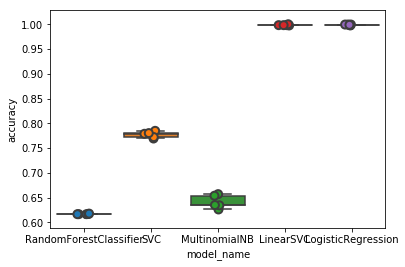

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    SVC(decision_function_shape='ovo', gamma=0.001, C=200.),
    MultinomialNB(),
    LinearSVC(random_state=0),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    model.fit(x_train, y_train)
    accuracies = cross_val_score(model, x_test, y_test, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()